# LAB 2 

Importing Libraries


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy.stats
import seaborn as sns
from math import sqrt
import scipy.stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


# Importing Dataset from Google Drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
raw_data = pd.read_csv("/content/drive/MyDrive/DATASET/fraudTrain.csv")
raw_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
import os
os.listdir()

['subsamples_lab_1.csv',
 'lab_1.ipynb',
 'MMA_Lab_2.ipynb',
 'Credit Card Fraud Dataset',
 'Untitled.ipynb',
 'Workshop1.zip',
 'pdf_MaxL.csv',
 'preprocessed_data.csv',
 '.ipynb_checkpoints',
 'Credit Card Fraud Dataset.zip',
 'Workshop1',
 'pdf_LSq.csv']

# Pre Processing the Dataset

In [5]:
if 'preprocessed_data.csv' in os.listdir():
    df = pd.read_csv('preprocessed_data.csv').drop(columns=['Unnamed: 0'])
else:
    df = raw_data.copy()
    df['trans_date_trans_time'] = raw_data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x))
    df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.hour*60+x.minute)
    df['year_of_birth'] =  df['dob'].apply(lambda x: pd.to_datetime(x).year)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,minute,year_of_birth
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1988
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1978
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1962
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1967
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,1986


In [15]:
cols = ['city_pop', 'amt', 'year_of_birth', 'lat', 'merch_lat', 'long', 'unix_time', 'merch_long']
subsamples = df[cols].sample(10000)
subsamples.head(3)

,city_pop,amt,year_of_birth,lat,merch_lat,long,unix_time,merch_long
752544,1078,78.13,1952,36.3850,36.330148,-98.0727,1353193954,-97.116391
1217103,1140,37.74,1986,40.5662,41.479970,-80.2099,1369396751,-80.704198
73221,509,1.10,1980,41.4972,41.777693,-98.7858,1329059827,-98.296913


In [5]:
# subsamples.to_csv('subsamples_lab_2.csv')
cols = ['city_pop', 'amt', 'year_of_birth', 'lat', 'merch_lat', 'long', 'unix_time', 'merch_long']
subsamples=pd.read_csv('subsamples_lab_2.csv', index_col=0)
subsamples.head()

,city_pop,amt,year_of_birth,lat,merch_lat,long,unix_time,merch_long
752544,1078,78.13,1952,36.3850,36.330148,-98.0727,1353193954,-97.116391
1217103,1140,37.74,1986,40.5662,41.479970,-80.2099,1369396751,-80.704198
73221,509,1.10,1980,41.4972,41.777693,-98.7858,1329059827,-98.296913
1242938,1179,12.14,1955,34.5189,35.162478,-112.2523,1370131103,-112.314255
768943,5512,78.95,1980,38.5072,38.454542,-81.8900,1353820620,-81.701749


# Variables
1. City Population
2. Amount 
3. Year of Birth
4. Customer Latitude
5. Merchant Latitude 
6. Customer Longitude 
7. Time
8. Merchant Longitude 

Following is the Plots of the same.  

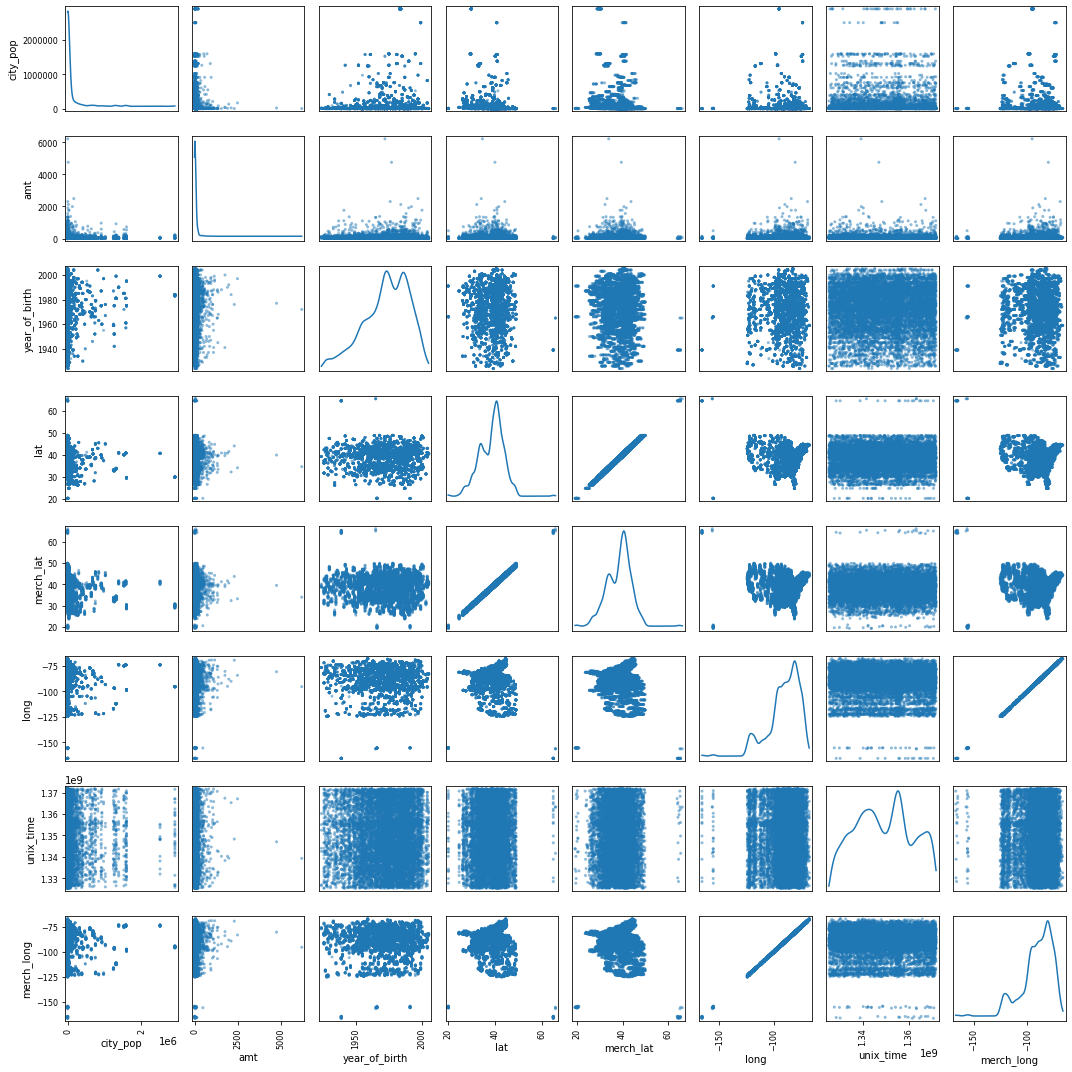

In [17]:
pd.plotting.scatter_matrix(subsamples.loc[:, "city_pop":"merch_long"], diagonal="kde", figsize=(15, 15))
plt.tight_layout()
plt.show()

# Step 1: 
You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) 

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_pop', ylabel='Density'>

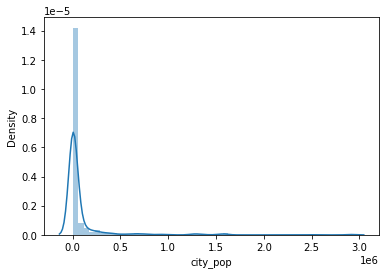

In [18]:
#city population
sns.distplot(subsamples['city_pop'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

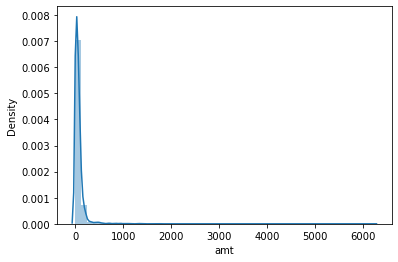

In [19]:
#Amount
sns.distplot(subsamples['amt'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_of_birth', ylabel='Density'>

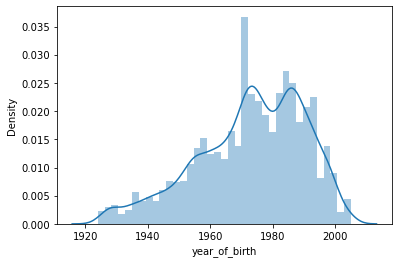

In [20]:
#year of birth
sns.distplot(subsamples['year_of_birth'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

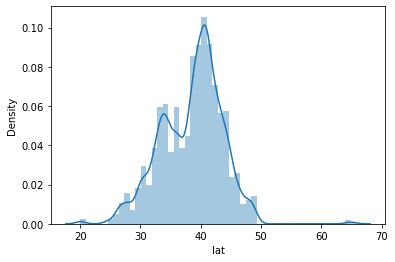

In [21]:
#customer lat
sns.distplot(subsamples['lat'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='merch_lat', ylabel='Density'>

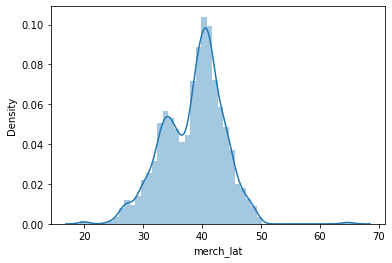

In [22]:
#merchant lat
sns.distplot(subsamples['merch_lat'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='long', ylabel='Density'>

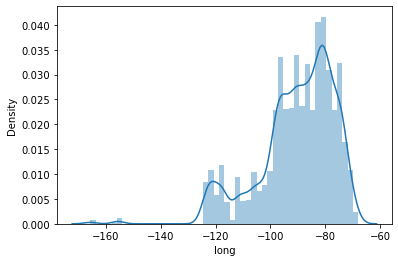

In [23]:
#customer longitude
sns.distplot(subsamples['long'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unix_time', ylabel='Density'>

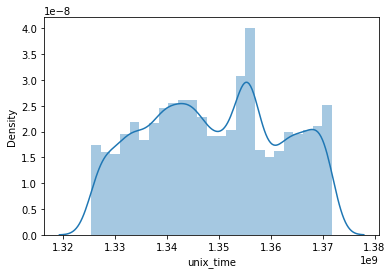

In [24]:
#time
sns.distplot(subsamples['unix_time'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='merch_long', ylabel='Density'>

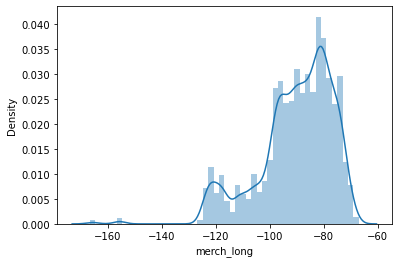

In [25]:
#merchat longitude
sns.distplot(subsamples['merch_long'], kde=True)

In [26]:
# choosing Target Value
y=subsamples['city_pop'].values

# choosing numeric features
x = subsamples.drop(columns=['city_pop'])

# Step 2
You need to make an estimation of multivariate mathematical expectation and
variance.

In [45]:
#UnConditional mean
x.mean()

amt              6.991566e+01
year_of_birth    1.972945e+03
lat              3.853606e+01
merch_lat        3.853598e+01
long            -9.036837e+01
unix_time        1.349092e+09
merch_long      -9.036606e+01
dtype: float64

In [50]:
x.var()

amt              1.940766e+04
year_of_birth    2.970186e+02
lat              2.574882e+01
merch_lat        2.614157e+01
long             1.933716e+02
unix_time        1.656962e+14
merch_long       1.937383e+02
dtype: float64

In [41]:
#UnConditional Std
x.cov()

,amt,year_of_birth,lat,merch_lat,long,unix_time,merch_long
amt,1.940766e+04,52.349323,-4.270537,-5.907066,2.032014e+01,-1.886633e+07,1.999002e+01
year_of_birth,5.234932e+01,297.018610,-4.769722,-4.752568,1.149480e+01,-5.605902e+05,1.153094e+01
lat,-4.270537e+00,-4.769722,25.748815,25.780049,-1.317814e+00,3.389090e+04,-1.302806e+00
merch_lat,-5.907066e+00,-4.752568,25.780049,26.141567,-1.178147e+00,1.686379e+05,-1.167236e+00
long,2.032014e+01,11.494796,-1.317814,-1.178147,1.933716e+02,-2.999215e+06,1.933872e+02
unix_time,-1.886633e+07,-560590.174407,33890.899714,168637.939770,-2.999215e+06,1.656962e+14,-2.928813e+06
merch_long,1.999002e+01,11.530940,-1.302806,-1.167236,1.933872e+02,-2.928813e+06,1.937383e+02


# Step 3:
You need to make a non-parametric estimation of conditional distributions,
mathematical expectations and variances. 


In [54]:
#Conditional mean
class2data = subsamples#[y==11.0]
class2data.loc[:, subsamples.columns != 'city_pop'].apply(np.mean)
#class2data.loc[:, "V2":].apply(np.mean)

amt              6.991566e+01
year_of_birth    1.972945e+03
lat              3.853606e+01
merch_lat        3.853598e+01
long            -9.036837e+01
unix_time        1.349092e+09
merch_long      -9.036606e+01
dtype: float64

In [55]:
#Conditional std
class2data.loc[:, subsamples.columns != 'city_pop'].apply(np.var)

amt              1.940571e+04
year_of_birth    2.969889e+02
lat              2.574624e+01
merch_lat        2.613895e+01
long             1.933523e+02
unix_time        1.656797e+14
merch_long       1.937189e+02
dtype: float64

In [57]:
cond_sample = subsamples.copy()
cond_sample['city_pop'] = y
cond_sample.head()

,city_pop,amt,year_of_birth,lat,merch_lat,long,unix_time,merch_long
752544,1078,78.13,1952,36.3850,36.330148,-98.0727,1353193954,-97.116391
1217103,1140,37.74,1986,40.5662,41.479970,-80.2099,1369396751,-80.704198
73221,509,1.10,1980,41.4972,41.777693,-98.7858,1329059827,-98.296913
1242938,1179,12.14,1955,34.5189,35.162478,-112.2523,1370131103,-112.314255
768943,5512,78.95,1980,38.5072,38.454542,-81.8900,1353820620,-81.701749


In [63]:
cond_sample['city_pop'].value_counts

<bound method IndexOpsMixin.value_counts of 752544      1078
1217103     1140
73221        509
1242938     1179
768943      5512
           ...  
615792       653
155208        46
59502       2870
987031     88735
420322       320
Name: city_pop, Length: 10000, dtype: int64>

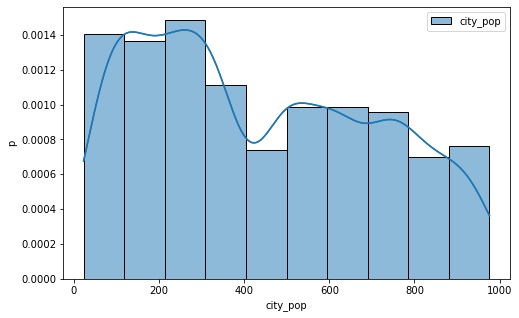

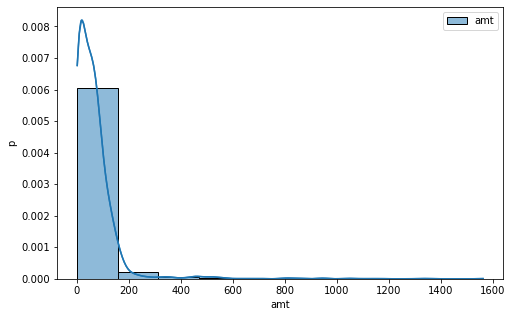

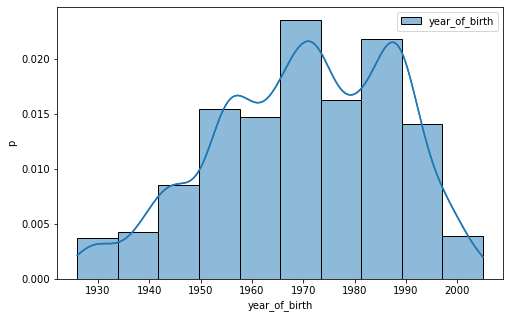

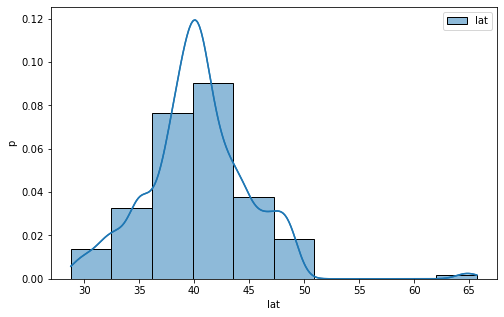

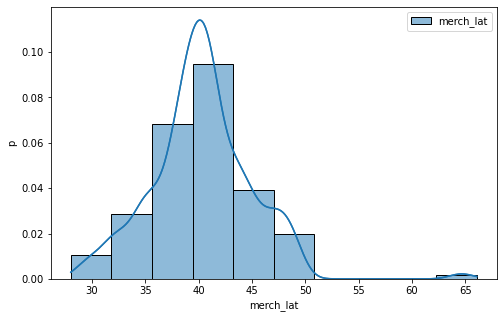

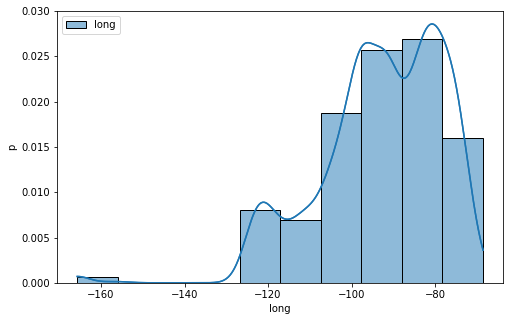

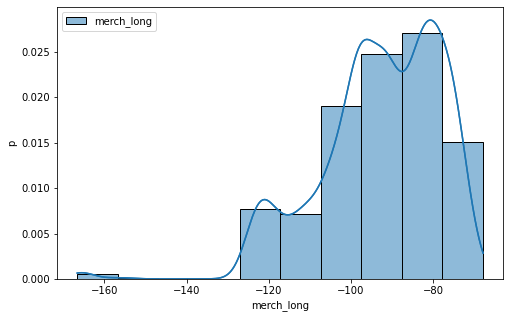

In [64]:
#Conditional Distribution - for T
cond_sample_11 = cond_sample[cond_sample['city_pop']<=1000][['city_pop','amt','year_of_birth','lat','merch_lat','long', 'merch_long']]

for index, column in enumerate(cond_sample_11.columns):

    plt.figure(figsize=(8, 5))

    kernel = stats.gaussian_kde(cond_sample_11[column])

    min_amount, max_amount = cond_sample_11[column].min(), cond_sample_11[column].max()
    x = np.linspace(min_amount, max_amount, len(cond_sample_11[column]))
    kde_values = kernel(x)

    sns.histplot(cond_sample_11[column], kde=True, stat='density', label=column, bins=10)
    plt.plot(x, kde_values)
    plt.ylabel('p')
    plt.xlabel(column)
    plt.legend()
    plt.show()

# Step 4:
You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [73]:
subsamples.corr()

,city_pop,amt,year_of_birth,lat,merch_lat,long,merch_long
city_pop,1.000000,0.005818,0.091271,-0.155730,-0.154781,-0.052715,-0.052687
amt,0.005818,1.000000,0.009748,-0.001926,-0.001873,-0.000187,-0.000151
year_of_birth,0.091271,0.009748,1.000000,-0.047845,-0.047458,0.030231,0.030154
lat,-0.155730,-0.001926,-0.047845,1.000000,0.993592,-0.015533,-0.015509
merch_lat,-0.154781,-0.001873,-0.047458,0.993592,1.000000,-0.015452,-0.015431
long,-0.052715,-0.000187,0.030231,-0.015533,-0.015452,1.000000,0.999120
merch_long,-0.052687,-0.000151,0.030154,-0.015509,-0.015431,0.999120,1.000000


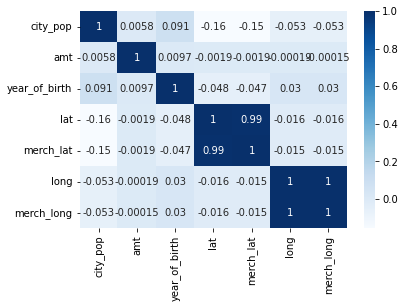

In [74]:
corrMatrix = subsamples.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

We have all of our variables in different scales, so we will normalize them:

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(subsamples.values)
data_scaled = pd.DataFrame(scaler.transform(subsamples.values), columns=cols)

In [8]:
data_scaled.mean()

city_pop         1.021461e-16
amt              7.901145e-18
year_of_birth   -5.124257e-15
lat              2.003847e-16
merch_lat       -1.196103e-16
long             1.045386e-16
unix_time        5.195777e-15
merch_long      -3.680056e-16
dtype: float64

In [9]:
data_scaled.var()

city_pop         1.0001
amt              1.0001
year_of_birth    1.0001
lat              1.0001
merch_lat        1.0001
long             1.0001
unix_time        1.0001
merch_long       1.0001
dtype: float64

In [10]:
data_scaled.corr()

,city_pop,amt,year_of_birth,lat,merch_lat,long,unix_time,merch_long
city_pop,1.000000,0.005005,0.083187,-0.162638,-0.161663,-0.039427,-0.004860,-0.039754
amt,0.005005,1.000000,0.021804,-0.006041,-0.008293,0.010489,-0.010521,0.010309
year_of_birth,0.083187,0.021804,1.000000,-0.054541,-0.053935,0.047964,-0.002527,0.048069
lat,-0.162638,-0.006041,-0.054541,1.000000,0.993663,-0.018676,0.000519,-0.018446
merch_lat,-0.161663,-0.008293,-0.053935,0.993663,1.000000,-0.016571,0.002562,-0.016402
long,-0.039427,0.010489,0.047964,-0.018676,-0.016571,1.000000,-0.016755,0.999133
unix_time,-0.004860,-0.010521,-0.002527,0.000519,0.002562,-0.016755,1.000000,-0.016347
merch_long,-0.039754,0.010309,0.048069,-0.018446,-0.016402,0.999133,-0.016347,1.000000


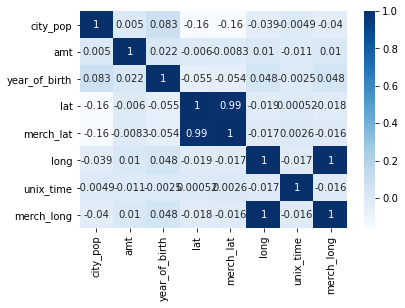

In [11]:
corrMatrix = data_scaled.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

In [29]:
import scipy.stats as stats
import itertools

def get_conf_interval_for_cor_coef(table, col1, col2):
    x = table[col1].apply(float).values
    y = table[col2].apply(float).values
    print(col1, col2)
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r) # matches Fisher transform
    # Corresponding standard deviation
    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    return r, p, lo_z, hi_z

for col1, col2 in list(itertools.product(cols, cols)):
    if col1!=col2:
        print("For {} and {}".format(col1, col2))
        r, p, lo_z, hi_z = get_conf_interval_for_cor_coef(data_scaled, col1, col2)
        print('\tCorrelation coefficient = ', r)
        print('\t"p-value:\t"', p)
        print('\tConfidence interval for the correlation coefficient ', lo_z, hi_z)

For city_pop and amt
city_pop amt
	Correlation coefficient =  0.005004863180444571
	"p-value:	" 0.6167745249938342
	Confidence interval for the correlation coefficient  -0.014597675483593512 0.024607485422467705
For city_pop and year_of_birth
city_pop year_of_birth
	Correlation coefficient =  0.08318679240129351
	"p-value:	" 7.943205241888634e-17
	Confidence interval for the correlation coefficient  0.06377689799829292 0.10298205890435413
For city_pop and lat
city_pop lat
	Correlation coefficient =  -0.16263802737912472
	"p-value:	" 3.0874396672173393e-60
	Confidence interval for the correlation coefficient  -0.18369779162141664 -0.14449263071535545
For city_pop and merch_lat
city_pop merch_lat
	Correlation coefficient =  -0.16166330051421052
	"p-value:	" 1.5739744810991234e-59
	Confidence interval for the correlation coefficient  -0.18269674429364696 -0.14349158338758572
For city_pop and long
city_pop long
	Correlation coefficient =  -0.03942652324989997
	"p-value:	" 8.02364477429279e

unix_time city_pop
	Correlation coefficient =  -0.004859956113209696
	"p-value:	" 0.6270113180752694
	Confidence interval for the correlation coefficient  -0.024462574829497975 0.01474258607656324
For unix_time and amt
unix_time amt
	Correlation coefficient =  -0.010520699756546632
	"p-value:	" 0.292814428816944
	Confidence interval for the correlation coefficient  -0.030123668397007666 0.00908149250905355
For unix_time and year_of_birth
unix_time year_of_birth
	Correlation coefficient =  -0.0025269539712651024
	"p-value:	" 0.8005277055981473
	Confidence interval for the correlation coefficient  -0.022129539802934788 0.017075621103126427
For unix_time and lat
unix_time lat
	Correlation coefficient =  0.0005188575628891495
	"p-value:	" 0.9586248892386824
	Confidence interval for the correlation coefficient  -0.019083722843580352 0.020121438062480863
For unix_time and merch_lat
unix_time merch_lat
	Correlation coefficient =  0.0025623187805456174
	"p-value:	" 0.79779620189679
	Confidence

In [21]:
data_scaled

,city_pop,amt,year_of_birth,lat,merch_lat,long,unix_time,merch_long
0,-0.290475,0.058967,-1.215392,-0.423932,-0.431449,-0.554064,0.318648,-0.484997
1,-0.290263,-0.230974,0.757525,0.400100,0.575826,0.730556,1.577444,0.694185
2,-0.292421,-0.493995,0.409363,0.583582,0.634059,-0.605347,-1.556334,-0.569815
3,-0.290130,-0.414744,-1.041311,-0.791703,-0.659838,-1.573804,1.634495,-1.576931
4,-0.275314,0.064853,0.409363,-0.005688,-0.015930,0.609730,0.367333,0.622513
...,...,...,...,...,...,...,...,...
9995,-0.291928,-0.053377,-0.403015,-0.755401,-0.825151,0.292092,-0.084541,0.345080
9996,-0.294004,-0.106355,0.815552,0.091413,0.234662,-1.384140,-1.283077,-1.412942
9997,-0.284348,-0.472962,1.511875,-0.996785,-1.138759,-0.010487,-1.608469,0.004036
9998,0.009244,-0.475474,0.873579,-1.899294,-2.052017,0.655951,0.860236,0.611036


In [ ]:
#Corelation = -0.0067 (considering Sign) --- Absolute Corelation = 0.0178
#P value = 2.52309

<AxesSubplot:>

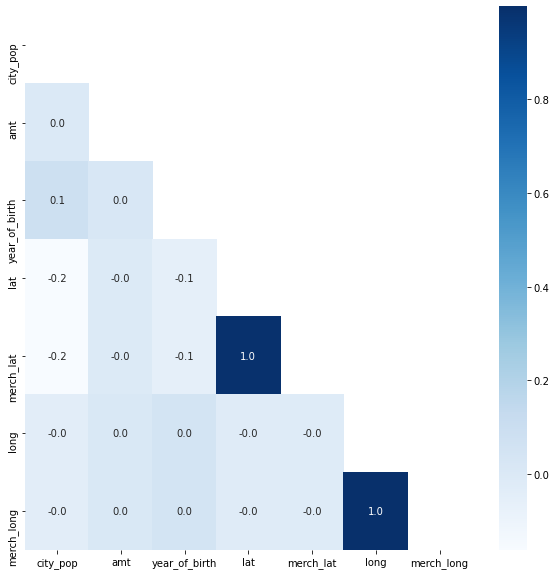

In [77]:
# selection of columns to build a correlation matrix
X_train = data_scaled[['city_pop', 'amt','year_of_birth','lat', 'merch_lat', 'long', 'merch_long']]

# building a diagonal mask
mask = np.zeros_like(X_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(X_train.corr(), mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

# Step 5:
Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

In [85]:
data_scaled.corr().apply(np.abs).sum().sort_values()

unix_time        1.054091
amt              1.072462
year_of_birth    1.312026
city_pop         1.496534
merch_long       2.148460
long             2.149015
merch_lat        2.253089
lat              2.254524
dtype: float64

Lattitude and longitude corellates to merchant coordinates too much, so we will choose city_pop as target variable.

Multivariate corellation (target - predictors):

In [91]:
data_scaled.corr()['city_pop'].drop('city_pop')

amt              0.005005
year_of_birth    0.083187
lat             -0.162638
merch_lat       -0.161663
long            -0.039427
unix_time       -0.004860
merch_long      -0.039754
Name: city_pop, dtype: float64

# Step 6:
Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X = subsamples[cols].drop(columns=['city_pop']).values
y = subsamples['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  125395.9880315485
Mean squared error =  82547697938.19496


In [117]:
#If normalized:
X = data_scaled[cols].drop(columns=['city_pop']).values
y = data_scaled['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
# Create a linear regression model
reg = LinearRegression()
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae_scaled = mean_absolute_error(y_test, y_pred)
mse_scaled = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae_scaled)
print('Mean squared error = ', mse_scaled)

Mean absolute error =  0.4557148157923038
Mean squared error =  1.0838389789284346


#### We will try linear models with regularization

In [118]:
from sklearn.linear_model import Ridge, Lasso, Lars, ElasticNet

X = data_scaled[cols].drop(columns=['city_pop']).values
y = data_scaled['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
best_alpha=0
best_mae=1000000
for alpha in np.linspace(0, 1, 10):
    # Create a linear regression model
    reg = Ridge(alpha=alpha)
    # Train a linear regression model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    params = np.append(reg.intercept_,reg.coef_)
    mae_scaled_ridge = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
    if best_mae>mae_scaled_ridge:
        best_mae=mae_scaled_ridge
        best_alpha=alpha
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(best_mae, best_alpha)

0.4556901549987327 1.0


In [119]:
best_alpha=0
best_mae=1000000
for alpha in np.linspace(0, 1, 10):
    # Create a linear regression model
    reg = Lasso(alpha=alpha)
    # Train a linear regression model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    params = np.append(reg.intercept_,reg.coef_)
    mae_scaled_lasso = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
    if best_mae>mae_scaled_lasso:
        best_mae=mae_scaled_lasso
        best_alpha=alpha
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(best_mae, best_alpha)

<ipython-input-119-d6d3b102ee90>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.4556993051492512 0.0


/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3205.2094504383804, tolerance: 0.6639655187462944
  model = cd_fast.enet_coordinate_descent(


In [120]:
best_alpha=0
best_mae=1000000
# Create a linear regression model
reg = Lars()
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae_scaled_Lars = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(mae_scaled_Lars)

0.4557148157923038


In [121]:
best_alpha=0
best_mae=1000000
for alpha in np.linspace(0, 1, 10):
    # Create a linear regression model
    reg = ElasticNet(alpha=alpha)
    # Train a linear regression model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    params = np.append(reg.intercept_,reg.coef_)
    mae_scaled_net = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
    if best_mae>mae_scaled_net:
        best_mae=mae_scaled_net
        best_alpha=alpha
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(best_mae, best_alpha)

<ipython-input-121-74a220d5e571>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.4556993051492512 0.0


/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3205.2094504383804, tolerance: 0.6639655187462944
  model = cd_fast.enet_coordinate_descent(


Regularization did not made a lot of effort, but still Ridge made the best prediction

In [167]:
X = data_scaled[cols].drop(columns=['city_pop']).values
y = data_scaled['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

reg = Ridge()
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred_lin = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae_scaled_ridge = mean_absolute_error(y_test, y_pred)
mse_scaled_ridge = mean_squared_error(y_test, y_pred)

Text(0, 0.5, 'Real')

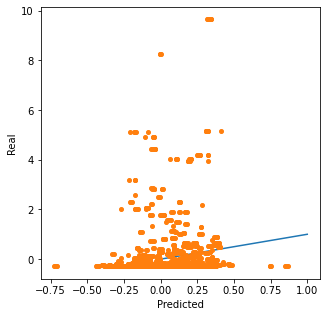

In [168]:
plt.figure(figsize=(5, 5))
plt.plot(np.linspace(0, 1, 3), np.linspace(0, 1, 3))
plt.plot(y_pred_lin, y_test, ls="", marker="o", markersize=4)
plt.xlabel(f'Predicted')
plt.ylabel('Real')

Since Linear models did not show a great reult and corellation of data is low, we will try non-linear regresion:

In [153]:
from sklearn.ensemble import RandomForestRegressor

best_mae = 1000000
best_mse = 1000000
best_depth = 0

for depth in range(1, 10):
    reg = RandomForestRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mae_scaled_forest = mean_absolute_error(y_test, y_pred)
    mse_scaled_forest = mean_squared_error(y_test, y_pred)
    print(depth, ':', mae_scaled_forest, mse_scaled_forest)
    if mae_scaled_forest<best_mae:
        best_mae = mae_scaled_forest
        best_mse = mse_scaled_forest
        best_depth = depth
        best_res = y_pred

1 : 0.4288595514577096 0.9277806706674686
2 : 0.3744184207932225 0.6263978612288861
3 : 0.35872006991505895 0.5304301406560844
4 : 0.3119503921614656 0.38177242787881166
5 : 0.2686765835274351 0.28862774379024553
6 : 0.23372452613611266 0.2336758109559815
7 : 0.20474483263541923 0.19088966217388043
8 : 0.16990921722603716 0.13392180314177135
9 : 0.13612736671376785 0.09101467064926165


# Step 7
Analyze the quality of regression model (distribution of residuals, determination coefficient).

Mean absolute error =  0.13612736671376785
Mean squared error =  0.09101467064926165


Text(0, 0.5, 'Real')

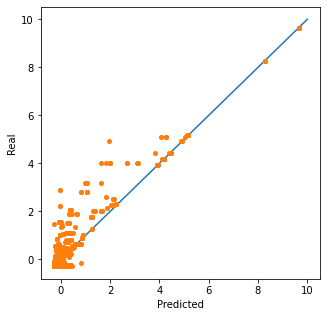

In [160]:
print('Mean absolute error = ', best_mae)
print('Mean squared error = ', best_mse)
max_val = int(max(y_test.max(), y_pred.max())+1)
plt.figure(figsize=(5, 5))
plt.plot(np.linspace(0, max_val, 3), np.linspace(0, max_val, 3))
plt.plot(best_res, y_test, ls="", marker="o", markersize=4)
plt.xlabel(f'Predicted')
plt.ylabel('Real')

MAE is lower, MSE is lower, QQ plot looks better, so we can conclude, that our data have non-linear dependence.

Text(0, 0.5, 'Age')

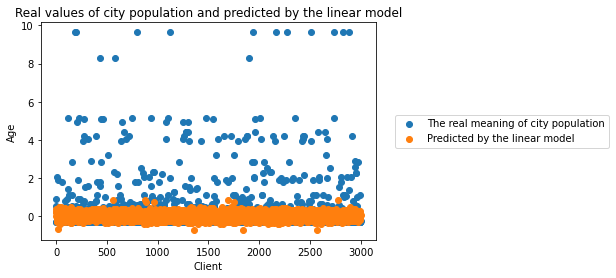

In [171]:
plt.scatter(range(y_test.shape[0]), y_test, label = u'The real meaning of city population')
plt.scatter(range(y_test.shape[0]), y_pred_lin, label = u'Predicted by the linear model')
plt.title(u'Real values of city population and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Client')
plt.ylabel(u'Age')

Text(0, 0.5, 'Age')

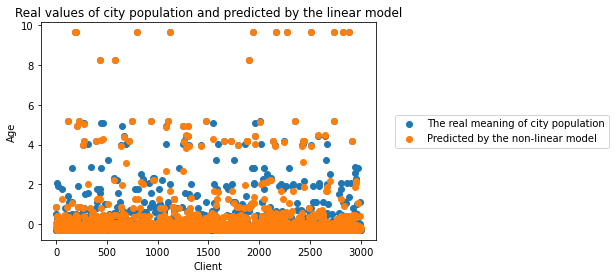

In [172]:
plt.scatter(range(y_test.shape[0]), y_test, label = u'The real meaning of city population')
plt.scatter(range(y_test.shape[0]), best_res, label = u'Predicted by the non-linear model')
plt.title(u'Real values of city population and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Client')
plt.ylabel(u'Age')

In [191]:
from sklearn.metrics import r2_score
print("Linear model: {}\nNon-linear model: {}".format(r2_score(y_test, y_pred_lin), r2_score(y_test, best_res)))

Linear model: 0.03650651710574837
Non-linear model: 0.9091357635176304


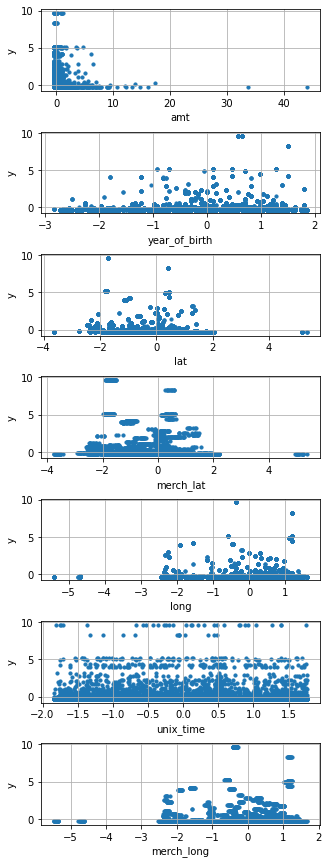

In [190]:
X = data_scaled.drop(columns=['city_pop'])
y = data_scaled[['city_pop']]
# X = pd.DataFrame(scaler.fit_transform(X))

# Creation of subplot - several charts in one picture
fig, axs = plt.subplots(len(X.columns), 1, figsize=(5, 15))
plt.subplots_adjust(wspace=0, hspace=0.5)

# fig.set(size=(10, 10))

for i, col in enumerate(X.columns):
    axs[i].scatter(X[[col]],y,s=10)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('y')
    axs[i].grid(True)

In [118]:
# Selection of the three most significant features
X = subsamples[['city_pop', 'amt', 'year_of_birth']]
# Normalization of features
scaler = StandardScaler()
y = subsamples[['year_of_birth']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['city_pop','amt','year_of_birth']
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y))
y.columns = ['year_of_birth']
# Division into test and training samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Create and train a linear regression model
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_all = np.array(reg.predict(X))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


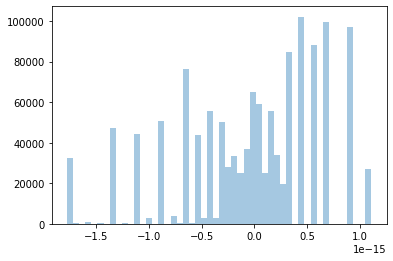

In [119]:
# Plotting the distribution of residuals
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)

In [120]:
#Confidence interval of regression coef 
import numpy as np, statsmodels.api as sm
mod = sm.OLS(train_Y, train_X)
res = mod.fit()
print (res.conf_int(0.01))  


                          0            1
amt                3.702807    13.575888
year_of_birth    176.482885   184.587542
lat           -11020.935582 -8213.243038
merch_lat      -1448.050235  1341.132017
long           -2357.703322   432.618384
merch_long     -1595.646194  1192.339814


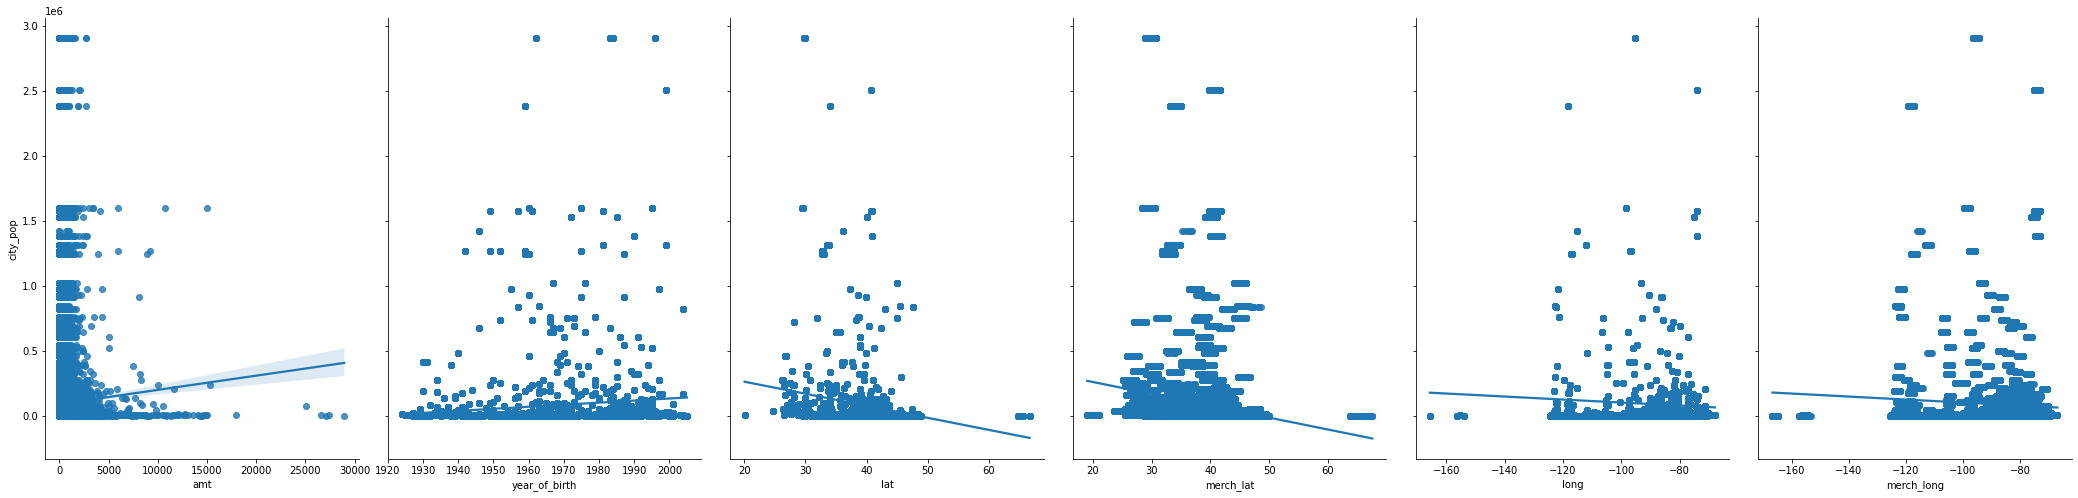

In [122]:
#Model Evaluation
sns.pairplot(df, x_vars=['amt',	'year_of_birth', 'lat',	'merch_lat', 'long',	'merch_long'], y_vars='city_pop', height=7, aspect=0.7, kind='reg')